In [136]:
from netCDF4 import Dataset
import numpy as np
import glob
import os
import pandas as pd
import wrf
import datetime
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
import cartopy.feature as cfeature
from cartopy import config
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import ShapelyFeature
from sklearn.metrics import mean_absolute_error,mean_squared_error
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [138]:
wrfile = Dataset('/media/lucasdmarten/HD/DADOS_TCC/RESULTADOS/CASO2/MEMBRO1/wrfout_d01_2018-09-22_18:00:00')
torres = pd.read_csv('/media/lucasdmarten/HD/backup/projetos/tcc/tcc/data/lat_lon_towers.txt', usecols=[1,2]).values
geo = Dataset('/media/lucasdmarten/HD/wrf/domains/firstDomainPC/geo_em.d01.nc')

In [139]:
wrfile

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    TITLE:  OUTPUT FROM WRF V4.2.2 MODEL
    START_DATE: 2018-09-22_18:00:00
    SIMULATION_START_DATE: 2018-09-22_18:00:00
    WEST-EAST_GRID_DIMENSION: 100
    SOUTH-NORTH_GRID_DIMENSION: 100
    BOTTOM-TOP_GRID_DIMENSION: 40
    DX: 15000.0
    DY: 15000.0
    AERCU_OPT: 0
    AERCU_FCT: 1.0
    IDEAL_CASE: 0
    DIFF_6TH_SLOPEOPT: 0
    AUTO_LEVELS_OPT: 2
    DIFF_6TH_THRESH: 0.1
    DZBOT: 50.0
    DZSTRETCH_S: 1.3
    DZSTRETCH_U: 1.1
    SKEBS_ON: 0
    SPEC_BDY_FINAL_MU: 1
    USE_Q_DIABATIC: 0
    GRIDTYPE: C
    DIFF_OPT: 1
    KM_OPT: 4
    DAMP_OPT: 0
    DAMPCOEF: 0.2
    KHDIF: 0.0
    KVDIF: 0.0
    MP_PHYSICS: 8
    RA_LW_PHYSICS: 4
    RA_SW_PHYSICS: 4
    SF_SFCLAY_PHYSICS: 1
    SF_SURFACE_PHYSICS: 2
    BL_PBL_PHYSICS: 1
    CU_PHYSICS: 1
    SF_LAKE_PHYSICS: 0
    SURFACE_INPUT_SOURCE: 1
    SST_UPDATE: 0
    GRID_FDDA: 0
    GFDDA_INTERVAL_M: 0
    GFDDA_END_H: 0
    GRID_SFDDA: 

In [140]:
speed = wrf.getvar(wrfile,'wspd_wdir', timeidx=wrf.ALL_TIMES)[0]
z = wrf.getvar(wrfile, 'z', units='m')

In [141]:
topo = wrf.getvar(geo,'HGT_M')
topo = int(topo[49,49].values)

In [142]:
speed_at100 = wrf.interplevel(speed, z, 108+topo)[:,49,49]

In [143]:
t = wrf.getvar(wrfile, 'times', timeidx=wrf.ALL_TIMES)
pred = speed_at100[36:-1]

In [147]:
d = pd.read_csv('../tcc/data/ecc3_.csv')

dCaso1 = d[(d.data>'2018-09-23') & (d.data<'2018-09-25')]
di = datetime.datetime(2018,9,23,0)
df = datetime.datetime(2018,9,25,0)
dates = []
while di < df:
    dates.append(di)
    di += datetime.timedelta(hours=1)

In [148]:
dCaso1.columns

Index(['data', 'hora', 'erro', 'hPa', 'tp', 'ur', 'vs_med', 'vs_max', 'vs_min',
       'vs_dev', 'ds_med', 'ds_dev', 'vi_med', 'vi_max', 'vi_min', 'vi_dev',
       'di_med', 'di_dev', 'vm_med', 'vm_max', 'vm_min', 'vm_dev'],
      dtype='object')

In [149]:
box=[]
box_p=[]
datas=[]
i=0
while i < 288:
    box_p.append(list(pred[i:i+6].values))
    box.append(list(map(float,dCaso1.iloc[i:i+6,6].to_list())))
    datas.append(list(map(str,dCaso1.iloc[i:i+6,0].to_list()))[-1])
    i+=6
newdates=[]
for i in range(len(datas)):
    date_obj = datetime.datetime.strptime(datas[i], '%Y-%m-%d %H:%M:%S')
    newdates.append('{:02d}/{:02d} - {:02d}hrs'.format(date_obj.day,date_obj.month,date_obj.hour))

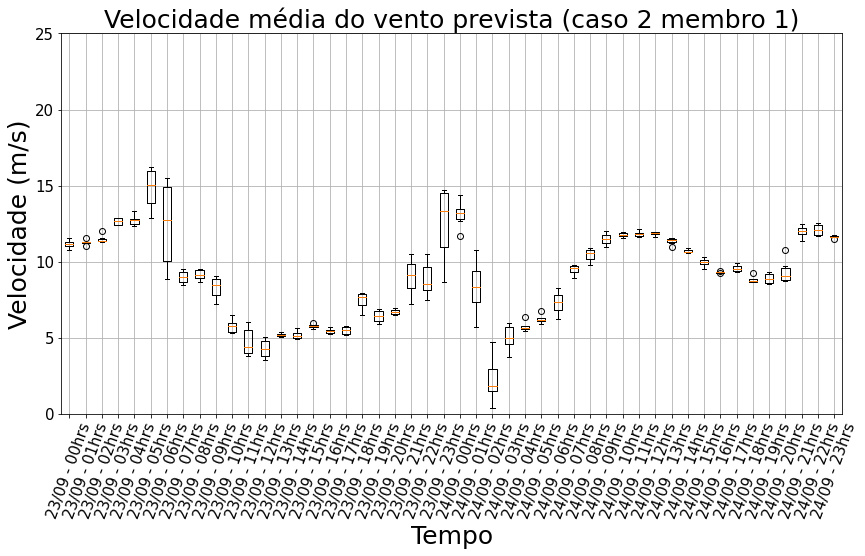

In [156]:
fig = plt.figure(figsize =(14, 7))
# Creating plot
plt.boxplot(x=box_p, labels=newdates)
degrees = 70
plt.xticks(rotation=degrees)
plt.ylabel("Velocidade (m/s)", fontsize=25)
plt.xlabel("Tempo", fontsize=25)
plt.yticks(fontsize=15)

plt.xticks(fontsize=15)
plt.ylim(0,25)
plt.grid(True)
plt.title("Velocidade média do vento prevista (caso 2 membro 1)",  fontsize=25)
# show plot
#plt.savefig('pred_memb3.png',dpi=300)
plt.show()

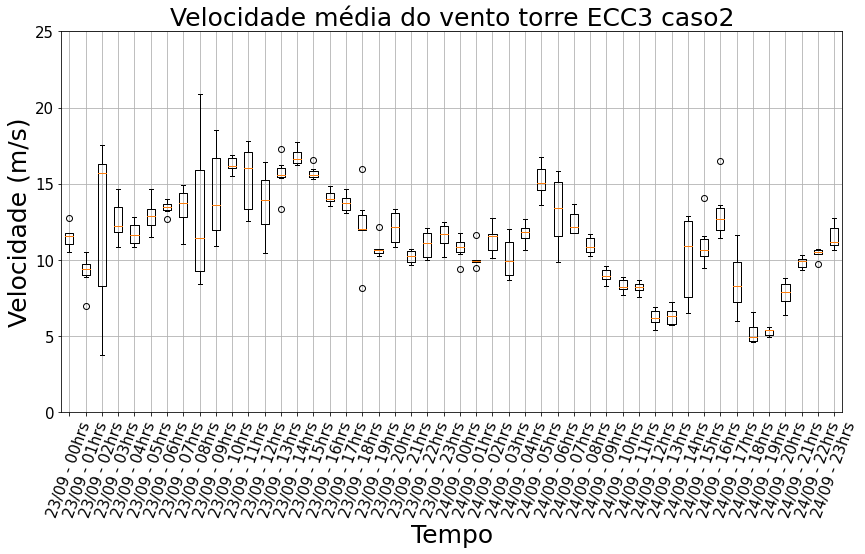

In [155]:
fig = plt.figure(figsize =(14, 7))
# Creating plot
plt.boxplot(x=box, labels=newdates)
degrees = 70
plt.xticks(rotation=degrees)
plt.ylabel("Velocidade (m/s)", fontsize=25)
plt.xlabel("Tempo", fontsize=25)
plt.yticks(fontsize=15)
plt.ylim(0,25)

plt.xticks(fontsize=15)

plt.grid(True)
plt.title("Velocidade média do vento torre ECC3 caso2",  fontsize=25)
# show plot
#plt.savefig('obs_ecc3.png',dpi=300)
plt.show()

In [39]:
dCaso1.columns

Index(['data', 'hora', 'erro', 'hPa', 'tp', 'ur', 'vs_med', 'vs_max', 'vs_min',
       'vs_dev', 'ds_med', 'ds_dev', 'vi_med', 'vi_max', 'vi_min', 'vi_dev',
       'di_med', 'di_dev', 'vm_med', 'vm_max', 'vm_min', 'vm_dev'],
      dtype='object')

In [66]:
path = '../jupyter_scripts/c1.m1.csv'
wrfcsv = pd.read_csv(path, usecols=[0,1,2,4,7,8,9,10,11])#
wrfcsv = wrfcsv[(wrfcsv.times>'2018-09-23') & (wrfcsv.times<'2018-05-25')]
dfcompara = pd.read_csv('../tcc/data/ecc3_.csv', usecols=[0,3,4,5,6,10,12,16,18])
dfcompara = dfcompara[(dfcompara.data>'2018-05-23') & (dfcompara.data<'2018-05-25')]

In [99]:
dfcompara

,data,hPa,tp,ur,vs_med,ds_med,vi_med,di_med,vm_med
0,2018-05-23 00:00:00,977,11.4,59.3,4.62,195,4.46,193,4.42
1,2018-05-23 00:10:00,977,11.3,59.5,4.32,189,4.57,190,4.26
2,2018-05-23 00:20:00,977,11.3,59.9,4.28,193,4.43,192,4.27
3,2018-05-23 00:30:00,977,11.2,60.2,4.14,192,4.09,192,4.02
4,2018-05-23 00:40:00,977,11.2,59.6,3.98,191,4.13,191,3.93
...,...,...,...,...,...,...,...,...,...
283,2018-05-24 23:10:00,979,13.1,62.1,7.03,88,6.07,90,6.32
284,2018-05-24 23:20:00,979,13,61.9,7.91,83,6.59,85,7.18
285,2018-05-24 23:30:00,979,12.7,64.4,8.17,82,6.85,84,7.55
286,2018-05-24 23:40:00,979,13.1,63.2,8.57,81,7.41,85,8


In [68]:
wrfcsv

,times,T2,R2,PSFC,wspd67,wdir65,wspd88,wspd108,wdir106
36,2018-05-23 00:00:00,279.62448,82.270240,988.83930,6.972328,224.564539,7.206808,7.345418,220.801363
37,2018-05-23 00:10:30,279.52588,82.450850,988.95710,6.924537,223.551012,7.150334,7.281176,219.681601
38,2018-05-23 00:21:00,279.43295,82.601295,989.11020,6.877312,222.424868,7.095578,7.219474,218.440860
39,2018-05-23 00:30:00,279.36176,82.737030,989.19250,6.833281,221.303609,7.045979,7.164559,217.238615
40,2018-05-23 00:40:30,279.26724,82.866790,989.24720,6.796067,219.862178,7.001347,7.112888,215.721205
...,...,...,...,...,...,...,...,...,...
319,2018-05-24 23:10:30,280.81190,64.748690,991.38617,4.071212,133.696291,4.069744,4.069484,131.541485
320,2018-05-24 23:21:00,280.74728,64.689064,991.38710,4.221583,132.322628,4.225480,4.235573,130.162228
321,2018-05-24 23:30:00,280.69177,64.730740,991.34040,4.369631,130.811066,4.380710,4.401316,128.667778
322,2018-05-24 23:40:30,280.62845,64.790306,991.40216,4.561074,129.003228,4.581061,4.614347,126.908465


In [108]:
print("EMA para vs_108")
print(mean_absolute_error(list(wrfcsv.wspd108.values),dfcompara.vs_med.astype('float').to_list()))
print('\n'*2)
print("EMA para ds_106")
print(mean_absolute_error(list(wrfcsv.wdir106.values),dfcompara.ds_med.astype('float').to_list()))
print('\n'*2)
print("EMA para vi_67")
print(mean_absolute_error(list(wrfcsv.wspd67.values),dfcompara.vi_med.astype('float').to_list()))
print('\n'*2)
print("EMA para di_65")
print(mean_absolute_error(list(wrfcsv.wdir65.values),dfcompara.di_med.astype('float').to_list()))
print('\n'*2)
print("EMA para vm_88")
print(mean_absolute_error(list(wrfcsv.wspd88.values),dfcompara.vm_med.astype('float').to_list()))

EMA para vs_108
1.9102036123082706



EMA para ds_106
54.76556505250627



EMA para vi_67
1.8324440837857112



EMA para di_65
61.19920488796457



EMA para vm_88
1.908888659343014


In [127]:
'''

pega csv criado a partir dos dados do wrf e calcula o obs - prev

'''

tamanho=len(wrfcsv)
ev_at108=[]
ed_at106=[]
ev_at88=[]
ev_at67=[]
ed_at65=[]
for i in range(tamanho):
#     p_psfc
#     p_t2
#     p_ur
    p_vs_108 = wrfcsv.wspd108.values[i]
    p_ds_106 = wrfcsv.wdir106.values[i]
    p_vi_67 = wrfcsv.wspd67.values[i]
    p_di_65 = wrfcsv.wdir65.values[i]
    p_vm_88 = wrfcsv.wspd88.values[i]
    
    vs_108 = dfcompara.vs_med.astype('float').values[i]
    ds_106 = dfcompara.ds_med.astype('float').values[i]
    vi_67 = dfcompara.vi_med.astype('float').values[i]
    di_65 = dfcompara.di_med.astype('float').values[i]
    vm_88 = dfcompara.vm_med.astype('float').values[i]
    
    ev_at108.append(vs_108-p_vs_108)
    ed_at106.append(ds_106-p_ds_106)
    ev_at88.append(vm_88-p_vm_88)
    ev_at67.append(vi_67-p_vi_67)
    ed_at65.append(di_65-p_di_65)
    
  
    

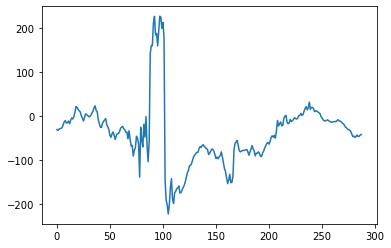

In [132]:
plt.plot(ed_at65)

In [157]:
mean_absolute_error(box,box_p)

4.500397951842603

In [158]:
mean_squared_error(dCaso1.vs_med,pred)

31.61849026311872

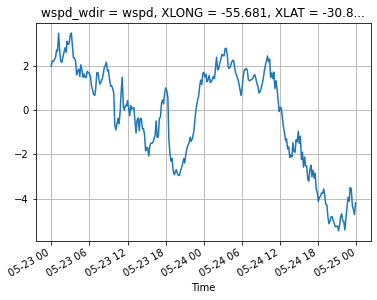

In [22]:
x =  pred-dCaso1.vs_med.astype(float)
plt.grid()
x.plot()